<a href="https://colab.research.google.com/github/shumshersubashgautam/KU-Research-Gait_Analysis/blob/main/gaitanalysis_mediumdata_1541_sample_RF_test_acc_98_05_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive 
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!cp /content/gdrive/MyDrive/gait-final-joint-angles-dataset.csv /content/gaitphase/

In [193]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/content/gaitphase/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gaitphase/gait-final-joint-angles-dataset.csv


In [194]:
import warnings
warnings.filterwarnings('ignore')

In [195]:
data = '/content/1541.csv'

df = pd.read_csv(data)

In [196]:
df.shape

(1540, 4)

In [197]:
df.head()

,hip-angle,knee-angle,ankle-angle,phase
0,6.550148,5.248360,69.992699,1
1,5.613865,5.803525,70.005660,1
2,4.677418,5.811839,70.178645,1
3,3.236424,4.754232,70.189986,1
4,2.232917,3.748325,71.260598,1


In [198]:
df.columns

Index(['hip-angle', 'knee-angle', 'ankle-angle', 'phase'], dtype='object')

In [199]:
X = df.drop(['phase'], axis=1)

y = df['phase']

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [201]:
X_train.shape, X_test.shape

((1232, 3), (308, 3))

In [202]:
cols = X_train.columns

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [204]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [205]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [206]:
X_train.describe()

,hip-angle,knee-angle,ankle-angle
count,1.232000e+03,1.232000e+03,1.232000e+03
mean,6.488316e-18,2.306957e-17,-1.816729e-16
std,1.000406e+00,1.000406e+00,1.000406e+00
min,-8.693673e-01,-9.349025e-01,-3.185069e+00
25%,-6.771508e-01,-6.360674e-01,-3.074934e-01
50%,-4.629548e-01,-4.902655e-01,2.475452e-01
75%,2.839250e-01,5.030152e-01,7.705680e-01
max,3.359020e+00,4.379638e+00,2.147927e+00


In [207]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.9740


In [208]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('C=100.0 Model accuracy with rbf kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C=100.0 Model accuracy with rbf kernel : 0.9740


In [209]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=1.0 Model accuracy with linear kernel : 0.9773


In [210]:
linear_svc=SVC(kernel='linear', C=10.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=10.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=10.0 Model accuracy with linear kernel : 0.9773


In [211]:
linear_svc=SVC(kernel='linear', C=100.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=100.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=100.0 Model accuracy with linear kernel : 0.9773


In [212]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  9   7]
 [  0 292]]

True Positives(TP) =  9

True Negatives(TN) =  292

False Positives(FP) =  7

False Negatives(FN) =  0


<Axes: >

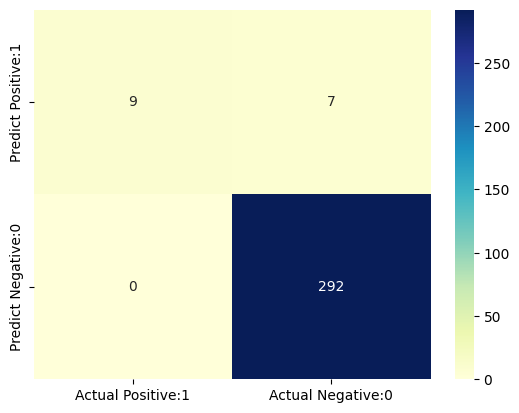

In [213]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        16
           1       0.98      1.00      0.99       292

    accuracy                           0.98       308
   macro avg       0.99      0.78      0.85       308
weighted avg       0.98      0.98      0.97       308



In [215]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [216]:
print('Cross-validation with linear kernel:\n\n{}'.format(linear_scores))

Cross-validation with linear kernel:

[0.97727273 0.96103896 0.97402597 0.97727273 0.97402597]


In [217]:
print('Average cross-validation with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average cross-validation with linear kernel:0.9727


In [218]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [219]:
print('Cross-validation with rbf kernel:\n\n{}'.format(rbf_scores))

Cross-validation with rbf kernel:

[0.97727273 0.95454545 0.97077922 0.97727273 0.97077922]


In [220]:
print('Average cross-validation with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average cross-validation with rbf kernel:0.9701


In [221]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

svc=SVC() 


parameters = [ {'C':[1, 10, 50], 'kernel':['linear']},
               {'C':[1, 10, 50], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.5, 0.9]}
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 50], 'kernel': ['linear']},
                         {'C': [1, 10, 50], 'gamma': [0.1, 0.2, 0.5, 0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [222]:
print('GridSearch CV best: {:.4f}\n\n'.format(grid_search.best_score_))


print('Best results :','\n\n', (grid_search.best_params_))

GridSearch CV best: 0.9822


Best results : 

 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [223]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/gaitphase'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/gaitphase/gait-final-joint-angles-dataset.csv


In [224]:
df = pd.read_csv('/content/1541.csv')

In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
import xgboost as XGB
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [69]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [226]:
df.head()

,hip-angle,knee-angle,ankle-angle,phase
0,6.550148,5.248360,69.992699,1
1,5.613865,5.803525,70.005660,1
2,4.677418,5.811839,70.178645,1
3,3.236424,4.754232,70.189986,1
4,2.232917,3.748325,71.260598,1


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hip-angle    1540 non-null   float64
 1   knee-angle   1540 non-null   float64
 2   ankle-angle  1540 non-null   float64
 3   phase        1540 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 48.2 KB


In [228]:
df.describe()

,hip-angle,knee-angle,ankle-angle,phase
count,1540.000000,1540.000000,1540.000000,1540.000000
mean,7.612559,11.096006,74.422823,0.934416
std,8.667422,11.850131,11.492355,0.247635
min,0.015720,0.000000,37.380481,0.000000
25%,1.728555,3.687091,70.888339,1.000000
50%,3.601799,5.384922,77.329622,1.000000
75%,10.114639,16.209701,83.184153,1.000000
max,37.042012,63.682231,99.295411,1.000000


In [229]:
df.isnull().sum().sort_values(ascending=False)

hip-angle      0
knee-angle     0
ankle-angle    0
phase          0
dtype: int64

In [230]:
df['hip-angle'].value_counts()

0.364936     9
3.884426     7
4.431013     7
4.567719     6
1.041627     6
            ..
26.246437    1
27.096077    1
28.543365    1
23.188428    1
4.104175     1
Name: hip-angle, Length: 1276, dtype: int64

Text(0.5, 1.0, 'phase')

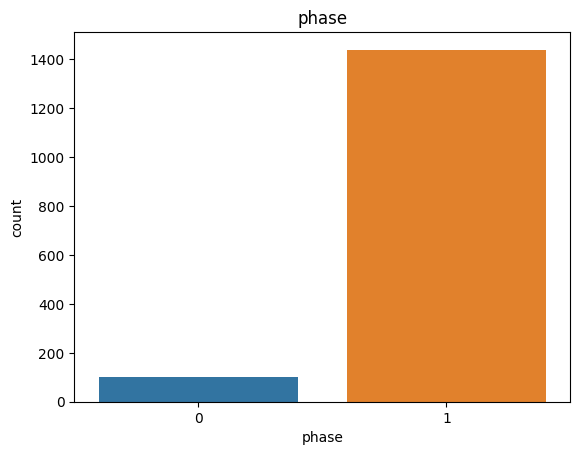

In [231]:
sns.countplot(x = df['phase'])
plt.title('phase')

array([[<Axes: title={'center': 'hip-angle'}>,
        <Axes: title={'center': 'knee-angle'}>],
       [<Axes: title={'center': 'ankle-angle'}>,
        <Axes: title={'center': 'phase'}>]], dtype=object)

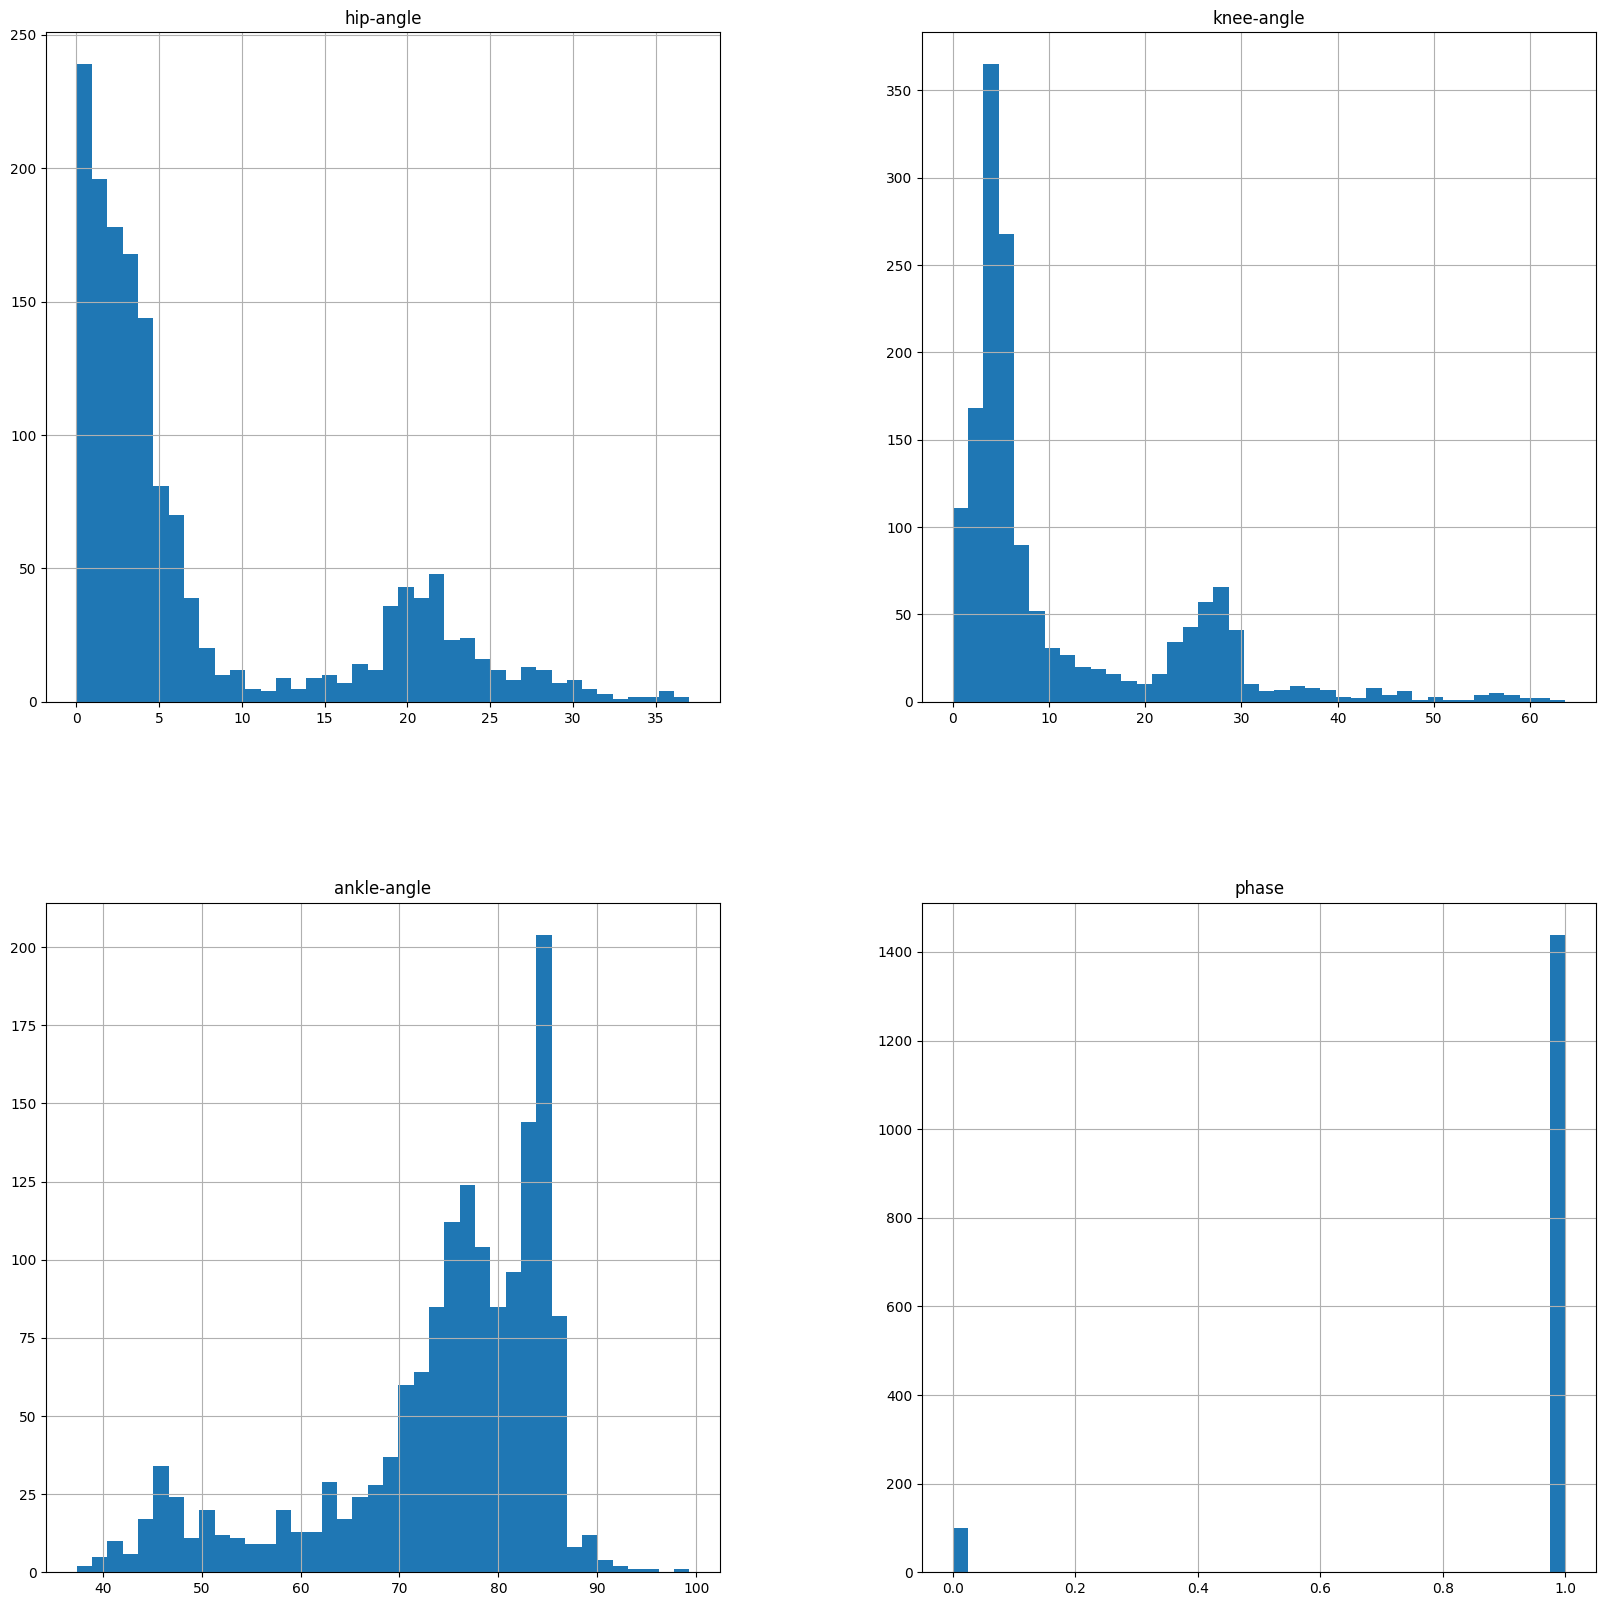

In [232]:
df.hist(bins = 40, figsize = (20,20))

<Axes: >

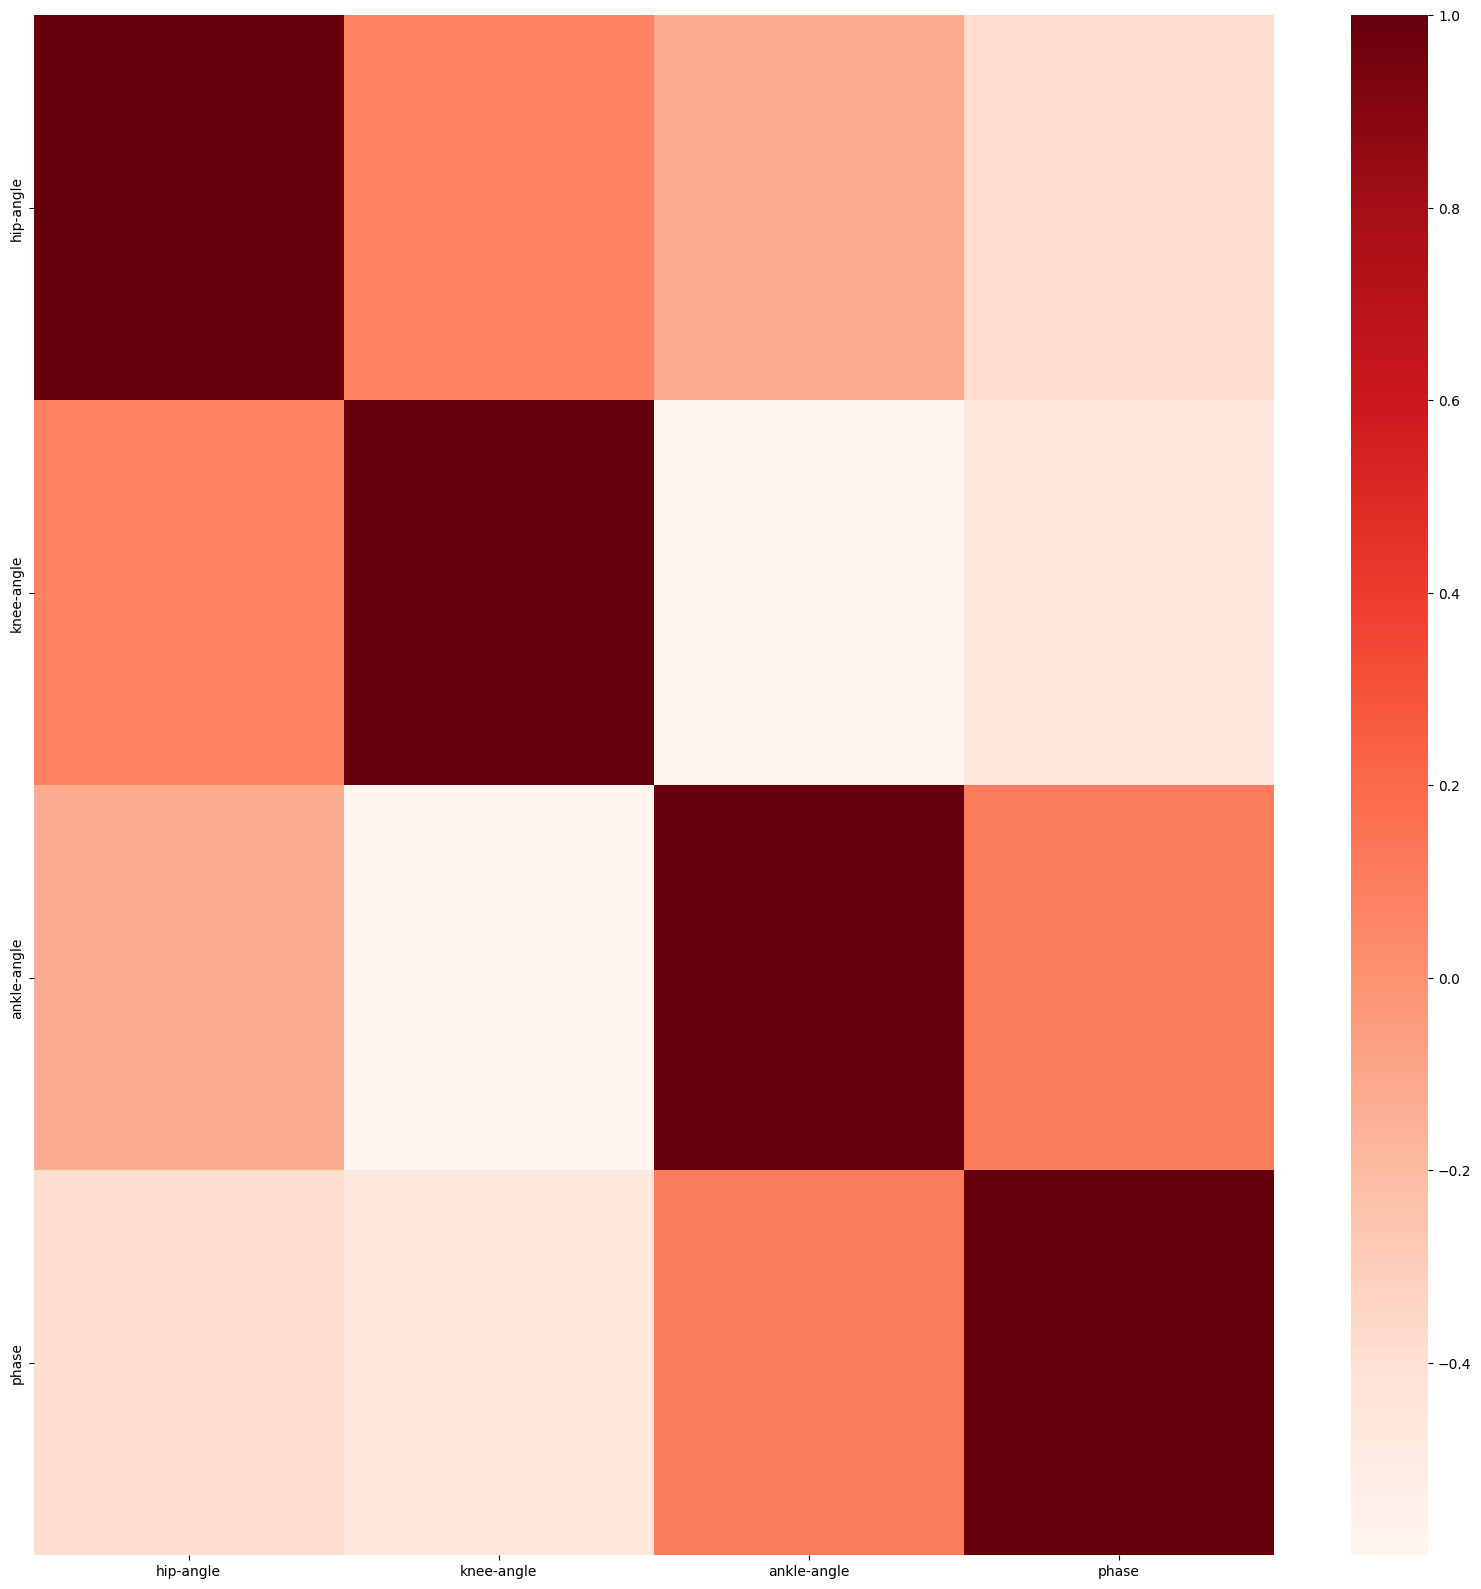

In [233]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap = 'Reds')

In [234]:
def preprocess(df):
    X = df.drop(['phase'], axis=1)

    y = df['phase']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
    
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [235]:
X_train, X_test, y_train, y_test = preprocess(df)

In [236]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1232, 3), (308, 3), (1232,), (308,))

In [237]:
y_test.value_counts() / len(y_test)

1    0.931818
0    0.068182
Name: phase, dtype: float64

In [238]:
var_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (kernel SVM)": SVC(kernel = 'rbf', random_state = 0),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models.items():
  model.fit(X_train, y_train)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (kernel SVM) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.011262
0:	learn: 0.6729026	total: 1.79ms	remaining: 1.79s
1:	learn: 0.6519227	total: 3.58ms	remaining: 1.79s
2:	learn: 0.6325118	total: 5.26ms	remaining: 1.75s
3:	learn: 0.6115968	total: 6.95ms	remaining: 1.73s
4:	learn: 0.5938964	total: 8.56ms	remaining: 1.7s
5:	learn: 0.5735304	total: 10.2ms	remaining: 1.69s
6:	learn: 0.5577307	total: 11.9ms	remaining: 1.68s
7:	learn: 0.5414146	total: 14.6ms	remaining: 1.82s
8:	learn: 0.5241474	total: 18.7ms	remaining: 2.06s
9:	learn: 0.5089298	total: 20.6ms	remaining: 2.04s
10:	learn: 0.4940209	total: 22.7ms	remaining: 2.04s
11:	learn: 0.4803782	total: 27.6ms	remaining: 2.2

In [239]:
var_results = []

for name, model in var_models.items():
  results = model.score(X_test, y_test)
  var_results.append(results)

  print('----------     '+name+'     ----------')

  model = var_models[name]
  y_test_pred = model.predict(X_test)
  print(metrics.classification_report(y_test_pred, y_test))
  print(name + ': {:.4f}%'.format(results * 100))
  print('Accuracy :{0:0.4f}'.format(metrics.accuracy_score(y_test_pred , y_test))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test_pred , y_test)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test_pred , y_test)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test_pred , y_test)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test_pred , y_test)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.52      0.92      0.67        12
           1       1.00      0.97      0.98       296

    accuracy                           0.96       308
   macro avg       0.76      0.94      0.82       308
weighted avg       0.98      0.96      0.97       308

Logistic Regression: 96.4286%
Accuracy :0.9643
AUC : 0.9414
Precision : 0.9965
Recall : 0.9662
F1 : 0.9811
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.99      0.97      0.98       293

    accuracy                           0.97       308
   macro avg       0.81      0.92      0.85       308
weighted avg       0.97      0.97      0.97       308

K-Nearest Neighbors: 96.7532%
Accuracy :0.9675
AUC : 0.9197
Precision : 0.9930
Recall : 0.9727
F1 : 0.9828
----------     Decision Tree    

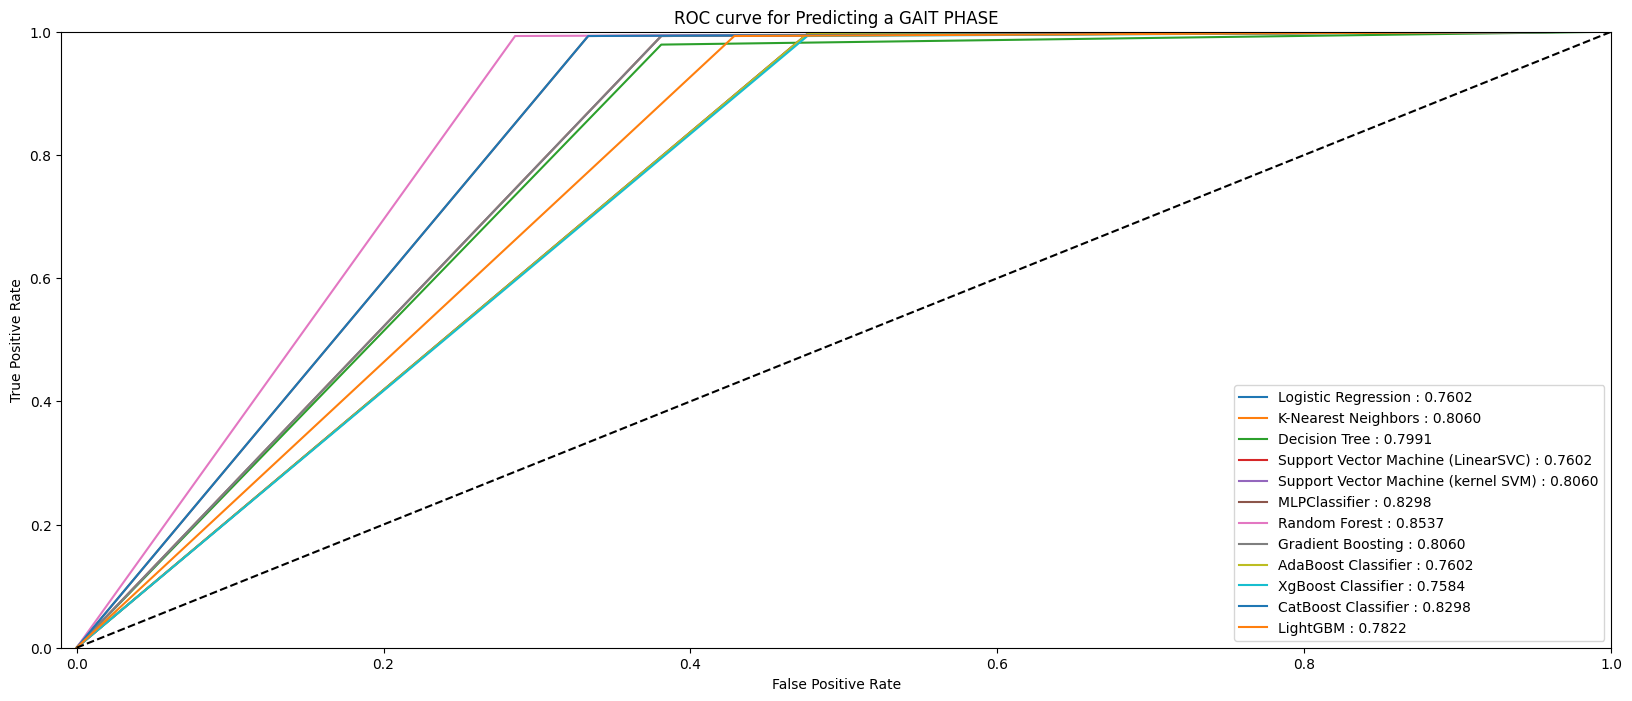

In [240]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models:
    y_pred = var_models[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a GAIT PHASE')
plt.legend(loc=4)
plt.show()


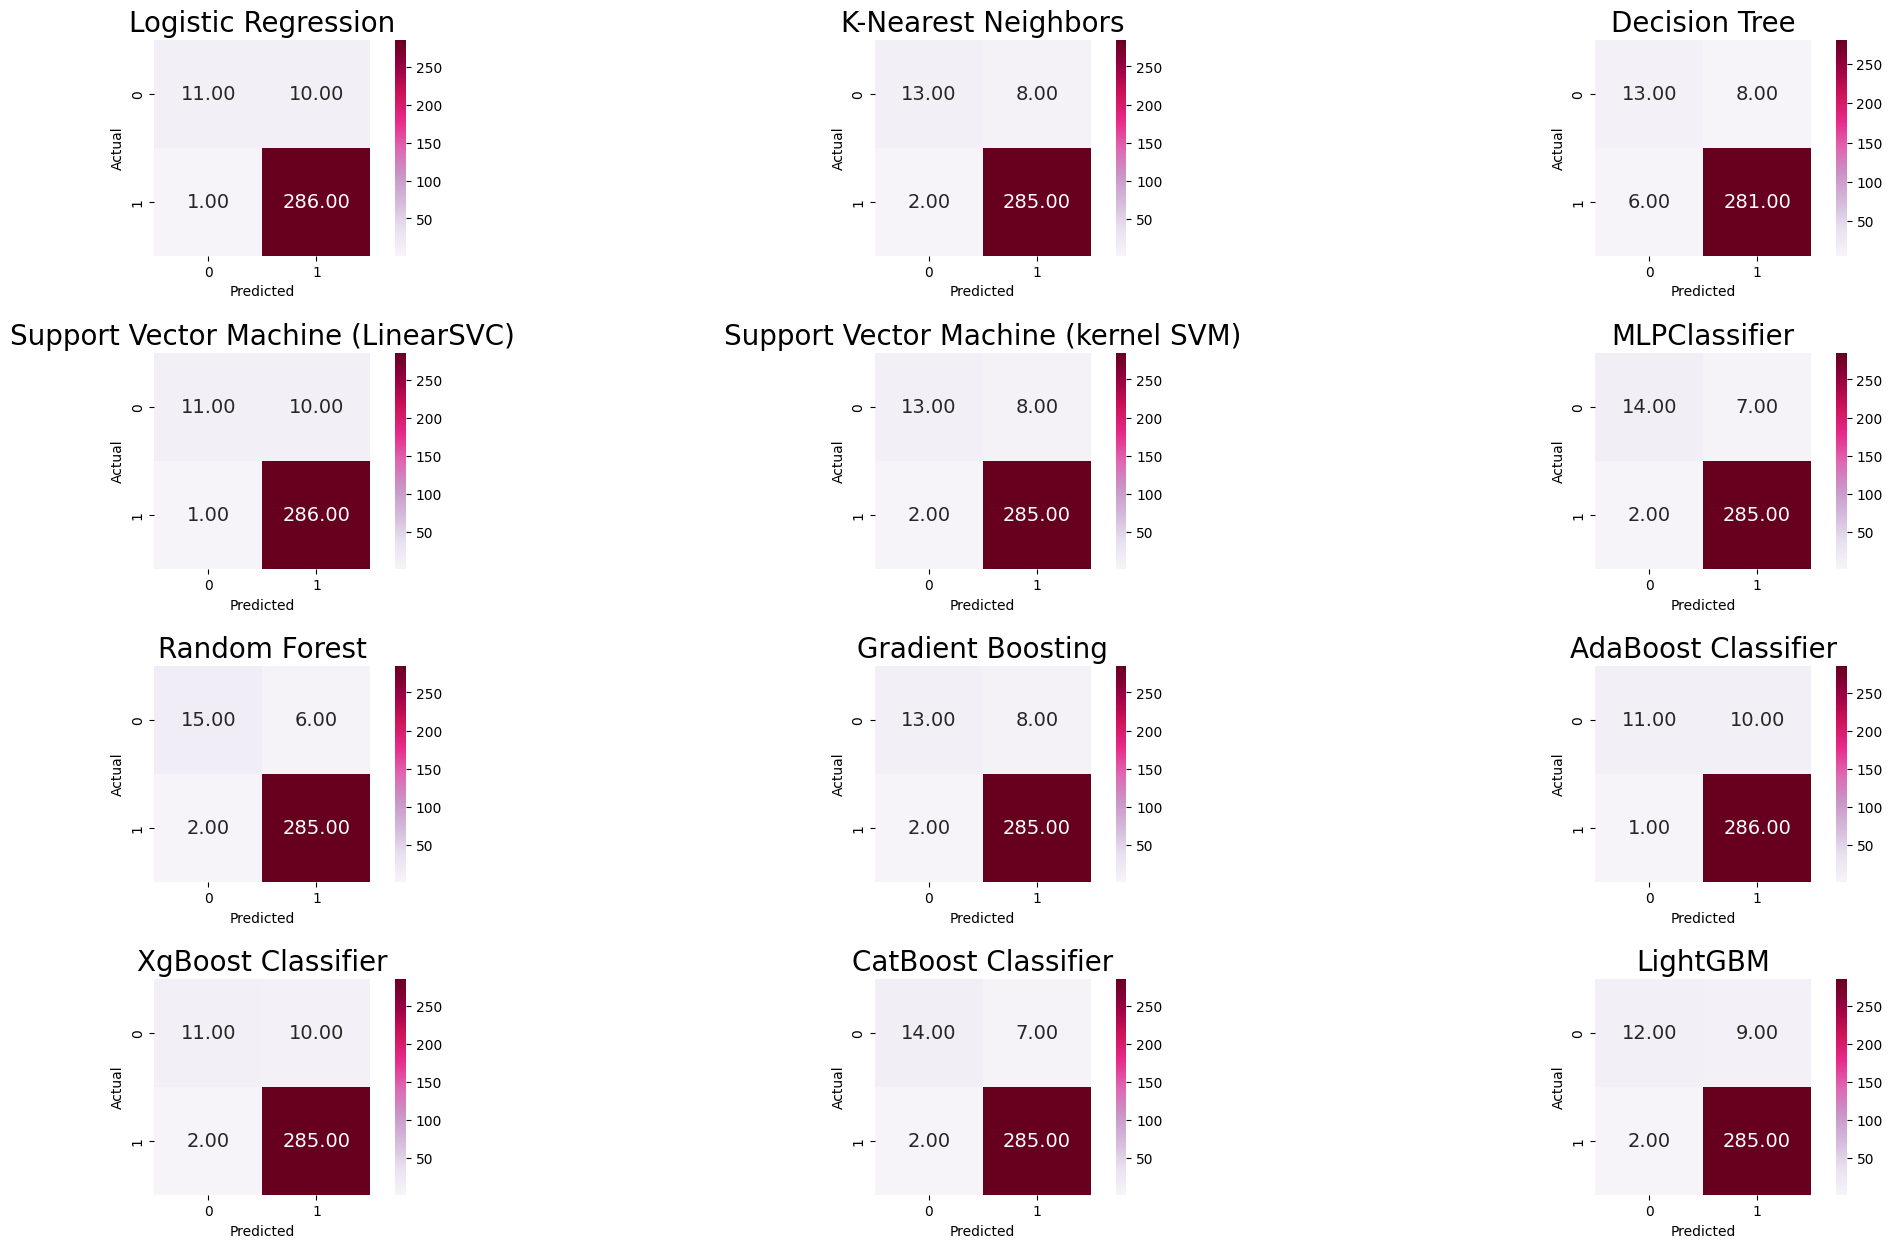

In [241]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models.items():
    results = model.score(X_test, y_test)
    model = var_models[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()

In [242]:
def preprocess(df):
    X = df.drop(['phase'], axis=1)

    y = df['phase']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
      
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
  
    return X_train, X_test, y_train, y_test

In [243]:
X_train, X_test, y_train, y_test = preprocess(df)

In [244]:
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'phase')

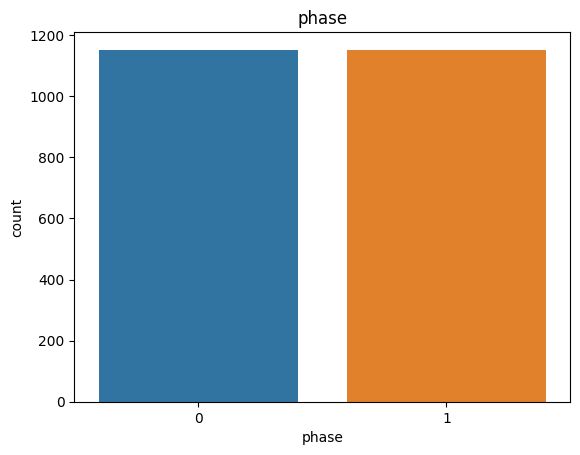

In [245]:
sns.countplot(x = y_train_smote)
plt.title('phase')

In [246]:
var_models_smote = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_smote.items():
  model.fit(X_train_smote, y_train_smote)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (SVC) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.014713
0:	learn: 0.6699752	total: 2.05ms	remaining: 2.05s
1:	learn: 0.6502655	total: 3.91ms	remaining: 1.95s
2:	learn: 0.6281416	total: 5.81ms	remaining: 1.93s
3:	learn: 0.6087851	total: 7.79ms	remaining: 1.94s
4:	learn: 0.5905666	total: 9.75ms	remaining: 1.94s
5:	learn: 0.5722830	total: 11.7ms	remaining: 1.93s
6:	learn: 0.5560678	total: 13.6ms	remaining: 1.93s
7:	learn: 0.5417049	total: 15.6ms	remaining: 1.94s
8:	learn: 0.5262920	total: 17.6ms	remaining: 1.93s
9:	learn: 0.5120632	total: 19.5ms	remaining: 1.93s
10:	learn: 0.4977921	total: 21.4ms	remaining: 1.92s
11:	learn: 0.4857957	total: 23.6ms	remaining: 1.94s
12:

In [247]:
var_results_smote = []

for name, model in var_models_smote.items():
  results_smote = model.score(X_test, y_test)
  var_results_smote.append(results_smote)

  print('----------     '+name+'     ----------')

  model = var_models_smote[name]
  y_test_pred_smote = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_smote))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_smote))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_smote)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_smote)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_smote)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_smote)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.45      0.86      0.59        21
           1       0.99      0.92      0.95       287

    accuracy                           0.92       308
   macro avg       0.72      0.89      0.77       308
weighted avg       0.95      0.92      0.93       308

Accuracy : 0.9188
AUC : 0.8902
Precision : 0.9888
Recall : 0.9233
F1 : 0.9550
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        21
           1       0.99      0.97      0.98       287

    accuracy                           0.96       308
   macro avg       0.84      0.91      0.87       308
weighted avg       0.97      0.96      0.97       308

Accuracy : 0.9643
AUC : 0.9146
Precision : 0.9894
Recall : 0.9721
F1 : 0.9807
----------     Decision Tree     ----------
              precision    recall  f1-score   

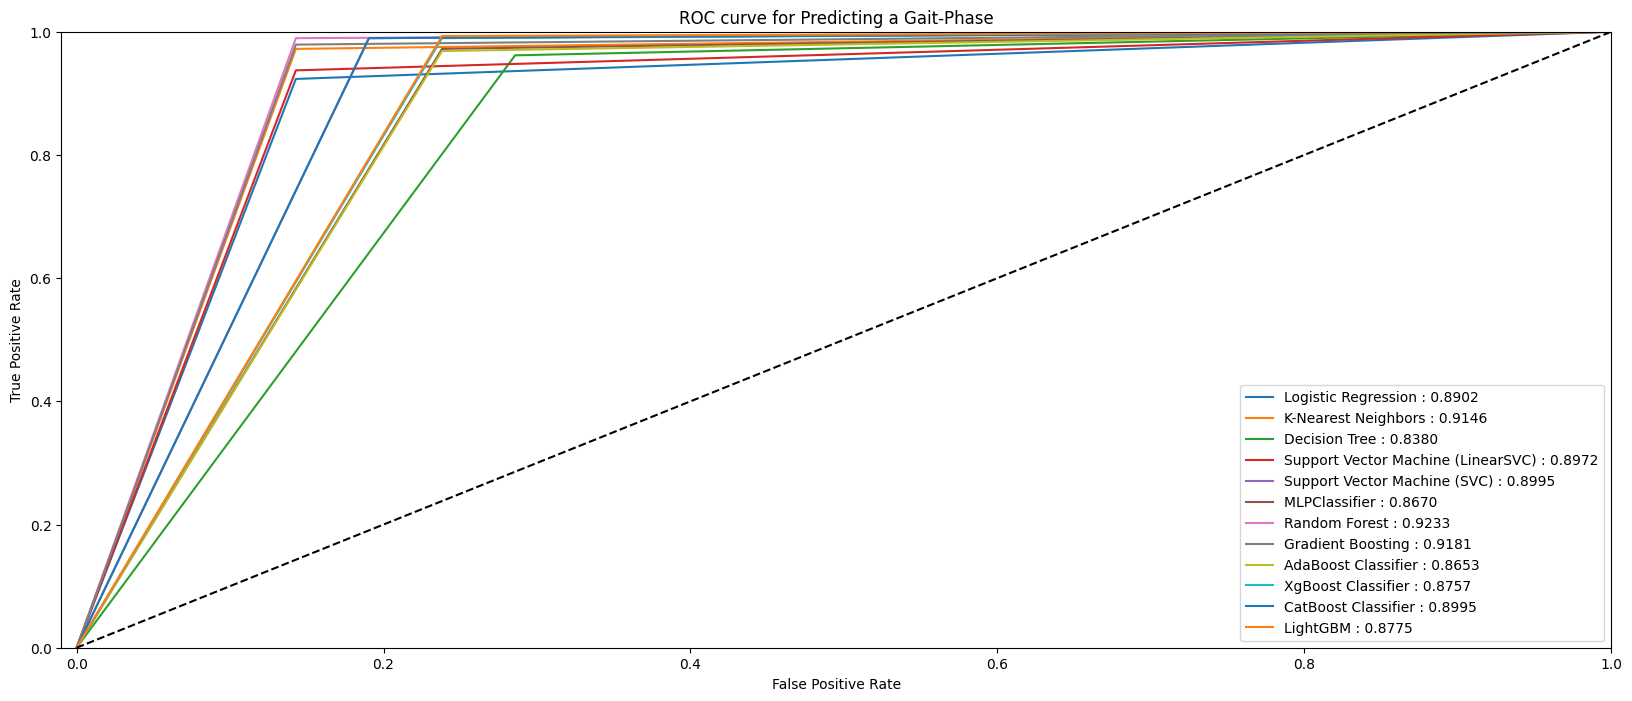

In [248]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_smote:
    y_pred = var_models_smote[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a Gait-Phase')
plt.legend(loc=4)
plt.show()

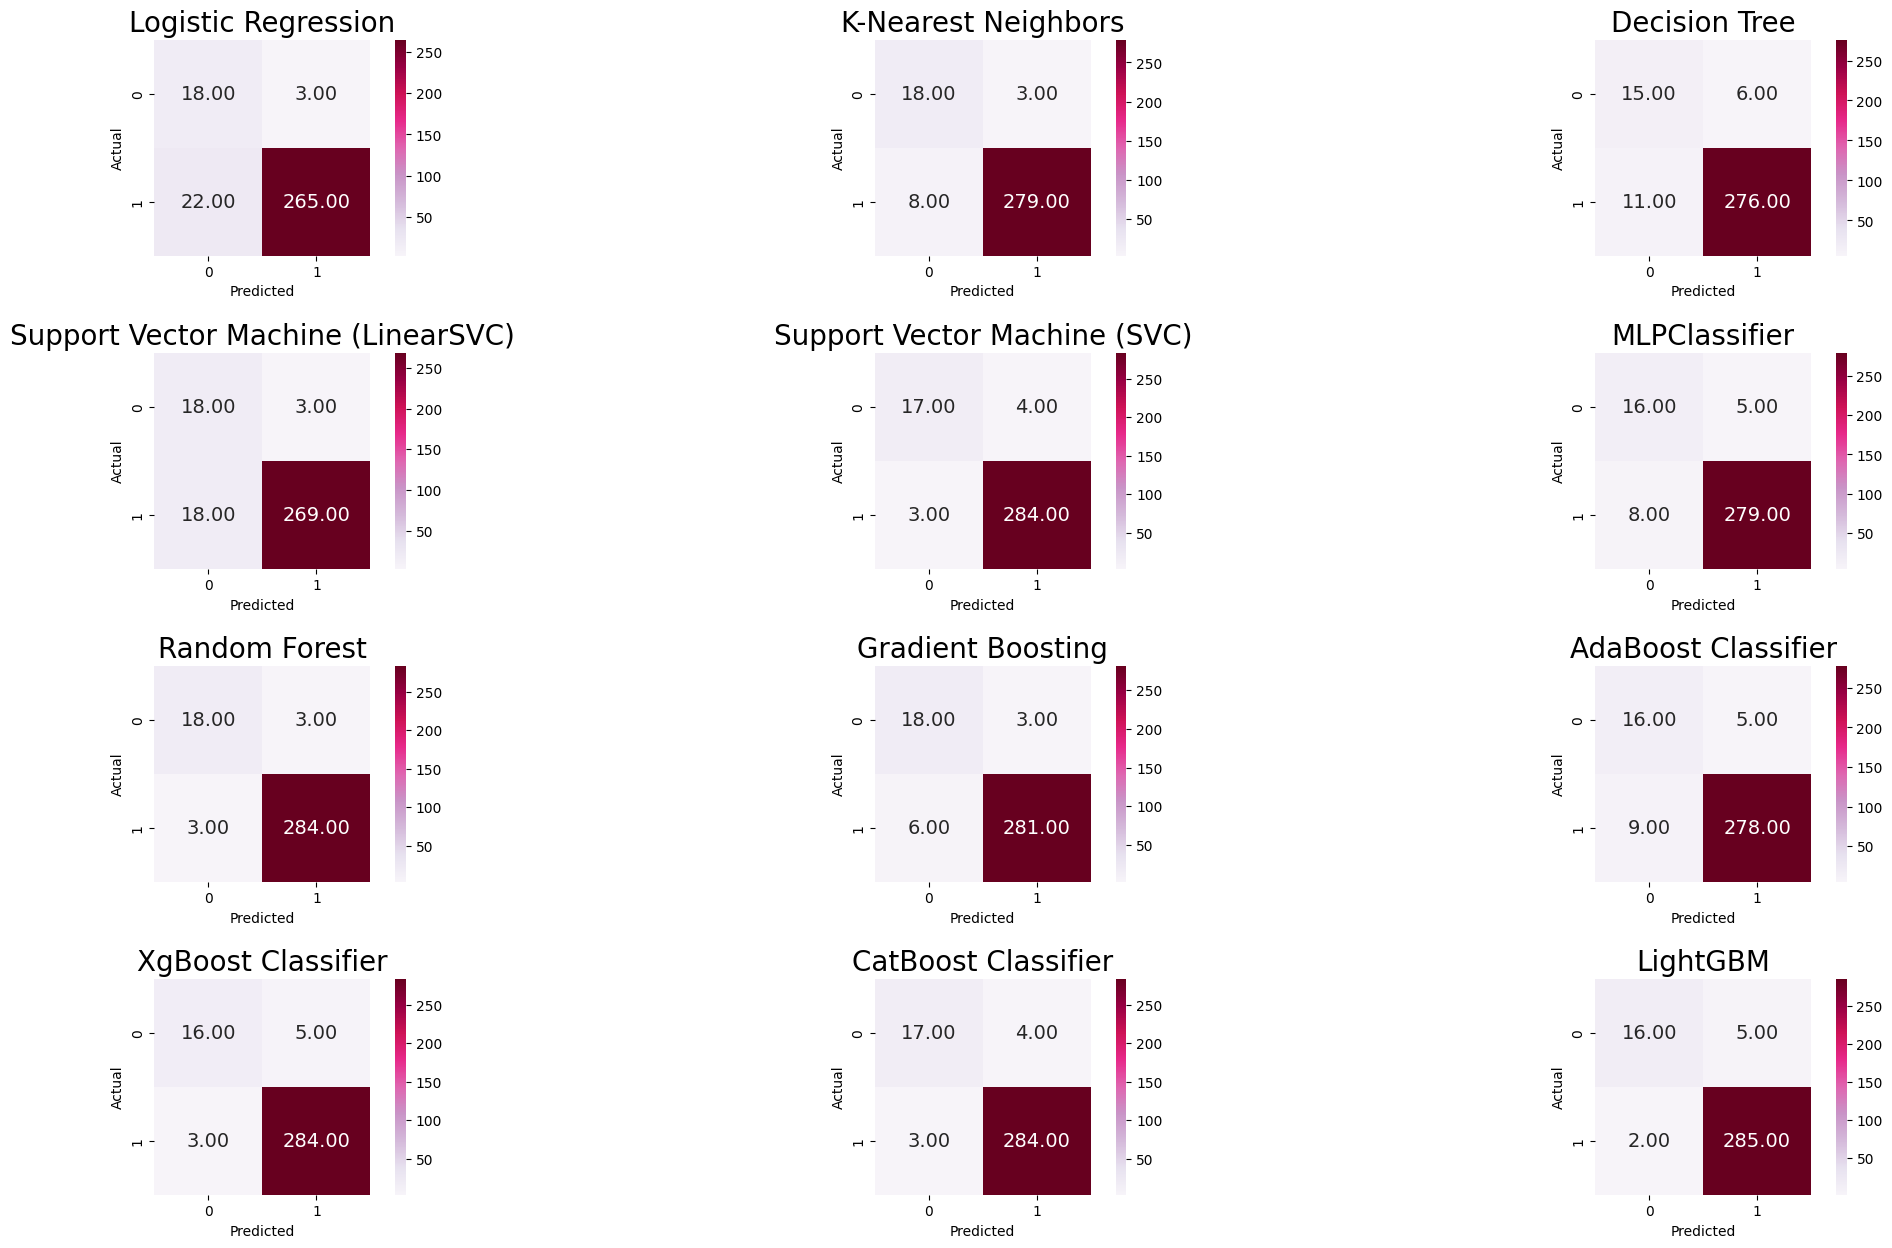

In [249]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_smote.items():
    results = model.score(X_test, y_test)
    model = var_models_smote[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1


In [250]:
def preprocess(df):
    X = df.drop(['phase'], axis=1)

    y = df['phase']


    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
      
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
  
    return X_train, X_test, y_train, y_test

In [251]:
X_train, X_test, y_train, y_test = preprocess(df)

In [252]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'phase')

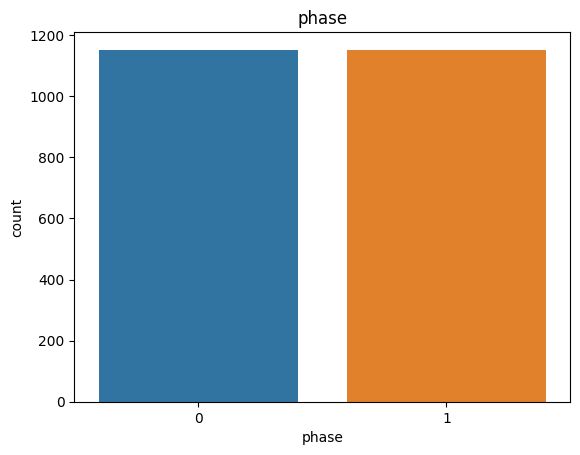

In [253]:
sns.countplot(x = y_train_adasyn)
plt.title('phase')

In [254]:
var_models_adasyn = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_adasyn.items():
  model.fit(X_train_adasyn, y_train_adasyn)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (SVC) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.014711
0:	learn: 0.6785171	total: 4.93ms	remaining: 4.93s
1:	learn: 0.6655403	total: 17.6ms	remaining: 8.78s
2:	learn: 0.6538855	total: 20.7ms	remaining: 6.86s
3:	learn: 0.6422832	total: 25.6ms	remaining: 6.38s
4:	learn: 0.6306317	total: 32.3ms	remaining: 6.43s
5:	learn: 0.6199060	total: 39ms	remaining: 6.46s
6:	learn: 0.6087531	total: 42.2ms	remaining: 5.99s
7:	learn: 0.5969989	total: 49.6ms	remaining: 6.15s
8:	learn: 0.5858029	total: 52.3ms	remaining: 5.76s
9:	learn: 0.5757775	total: 57.1ms	remaining: 5.65s
10:	learn: 0.5664517	total: 62.1ms	remaining: 5.59s
11:	learn: 0.5592045	total: 69.5ms	remaining: 5.72s
12:	l

In [255]:
var_results_adasyn = []

for name, model in var_models_adasyn.items():
  results_adasyn = model.score(X_test, y_test)
  var_results_adasyn.append(results_adasyn)

  print('----------     '+name+'     ----------')

  model = var_models_adasyn[name]
  y_test_pred_adasyn = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_adasyn))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_adasyn))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_adasyn)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_adasyn)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_adasyn)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_adasyn)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.17      0.86      0.28        21
           1       0.99      0.69      0.81       287

    accuracy                           0.70       308
   macro avg       0.58      0.78      0.55       308
weighted avg       0.93      0.70      0.78       308

Accuracy : 0.7045
AUC : 0.7753
Precision : 0.9851
Recall : 0.6934
F1 : 0.8139
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.51      0.90      0.66        21
           1       0.99      0.94      0.96       287

    accuracy                           0.94       308
   macro avg       0.75      0.92      0.81       308
weighted avg       0.96      0.94      0.94       308

Accuracy : 0.9351
AUC : 0.9210
Precision : 0.9926
Recall : 0.9373
F1 : 0.9642
----------     Decision Tree     ----------
              precision    recall  f1-score   

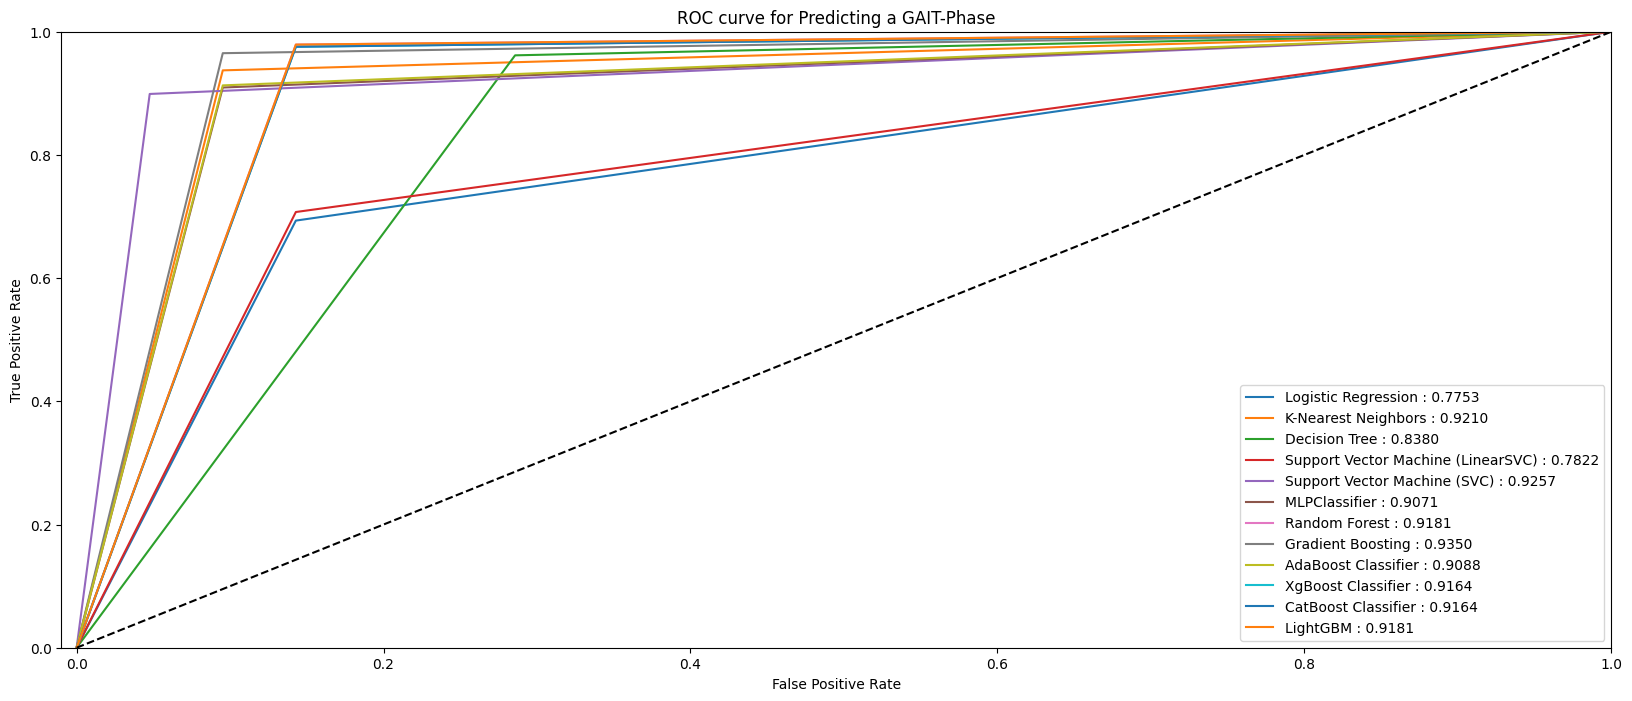

In [256]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_adasyn:
    y_pred = var_models_adasyn[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a GAIT-Phase')
plt.legend(loc=4)
plt.show()

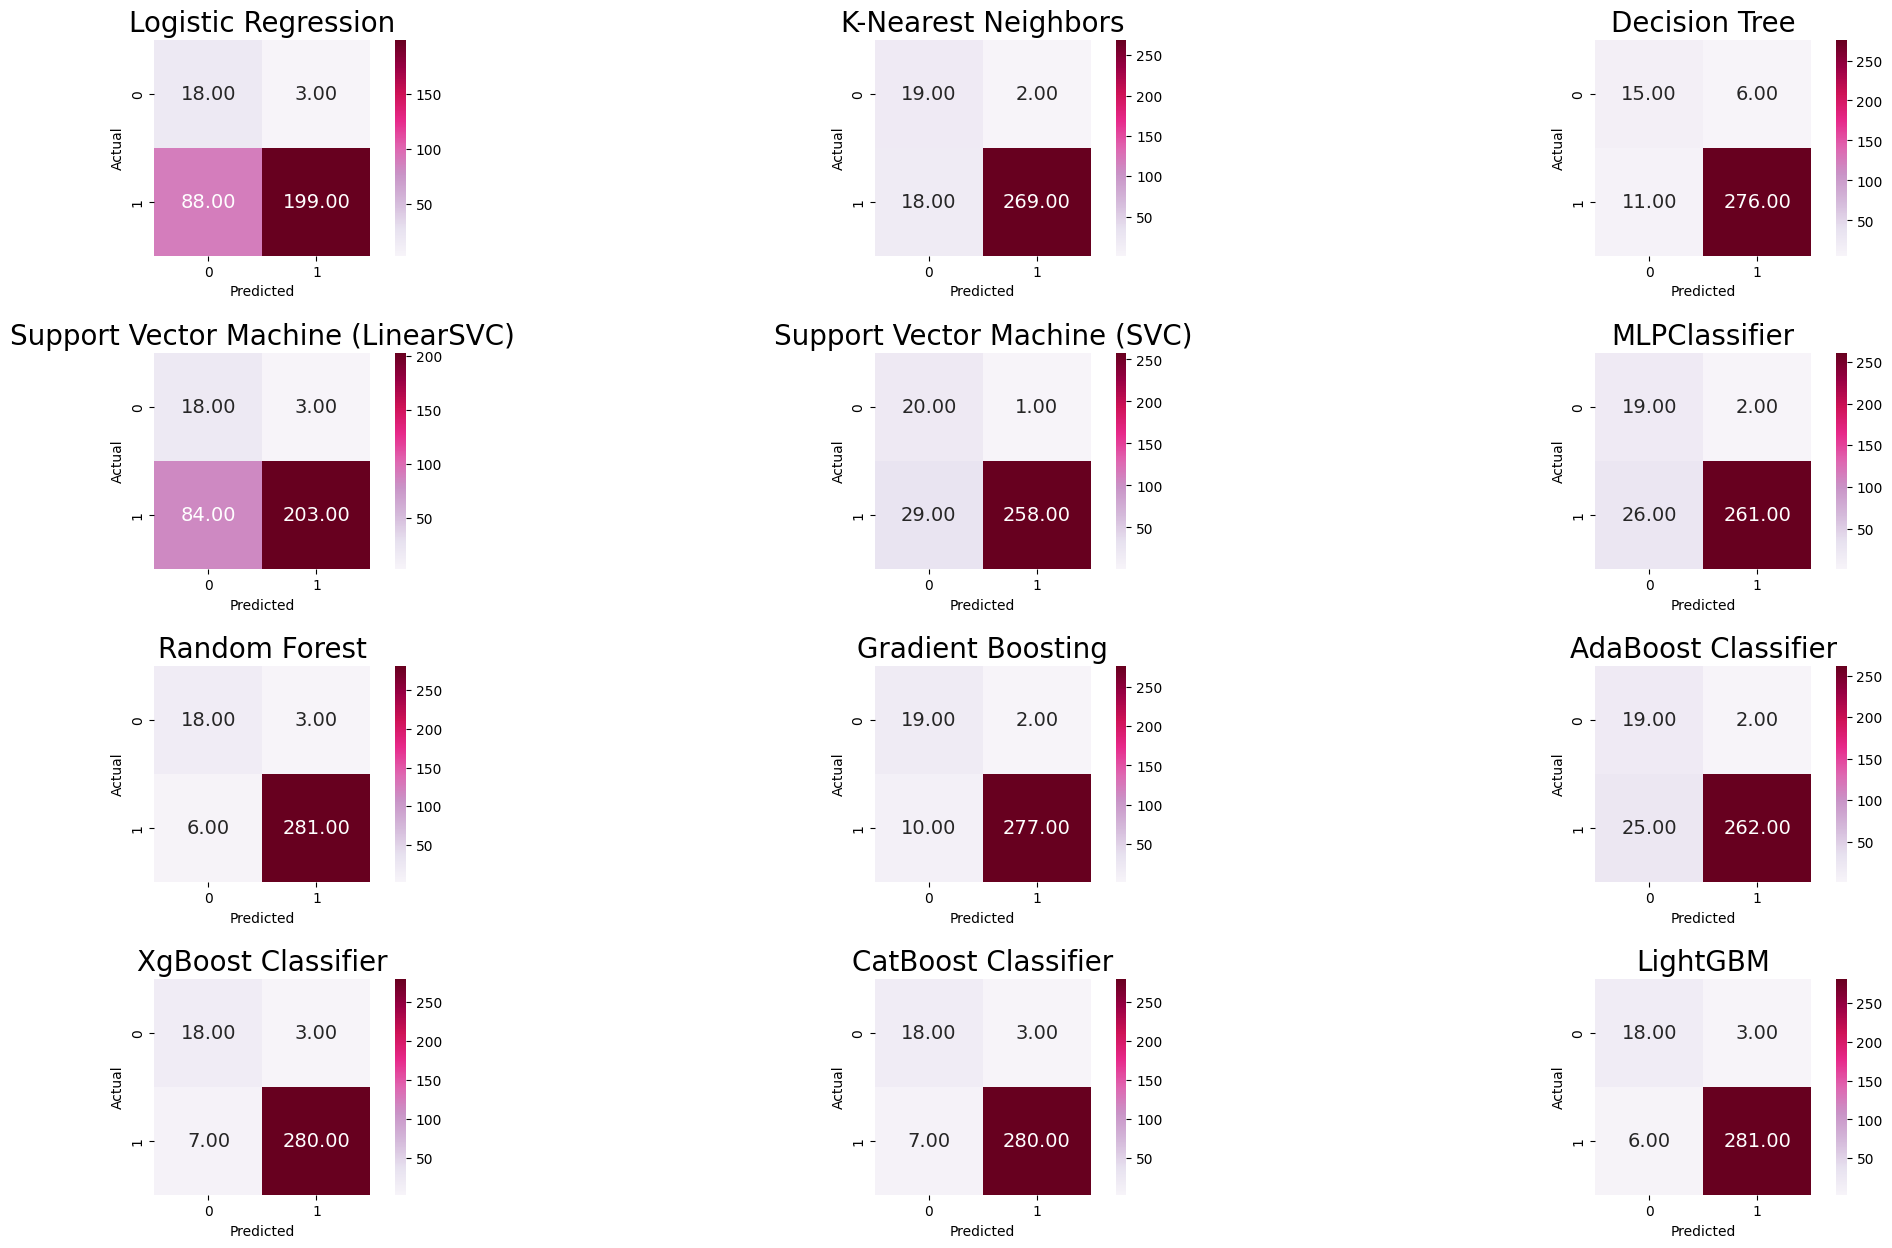

In [257]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_adasyn.items():
    results = model.score(X_test, y_test)
    model = var_models_adasyn[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()